In [1]:
from time import time
time_init = time()
from schrodi import *
import matplotlib.pyplot as plt
from pandas import DataFrame
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 
from numpy import conj, real

nx = 10000
x = linspace(-L,L,nx)

# Defining potential

def v(x):
    x = asarray(x)
    y = zeros(x.shape)
    y += (abs(x) < l) * V0
    y += (abs(x) > l) * 0
    return y

print("AQUEST RUN S'HA FET PER UNS VALORS DE V0 = %.2f eV" % V0)
print(" L = %.2f nm" % L)
print(" l = %.2f nm" % l)

AQUEST RUN S'HA FET PER UNS VALORS DE V0 = 0.00 eV
 L = 12.00 nm
 l = 0.05 nm


# Barrera de potencial, Pou de potencial... El que vulguem
Només s'ha de canviar el valor de V0 a $\texttt{schrody.py}$.
Començarem trobant l'espectre d'energies pròpies del hamiltonià.
Es representen en la taula següent. Escriure-les en un arxiu és easy després.

In [2]:
timenow = time()
E = find_states()
print('Valors propis trobats, hem tardat: %.3f s' % (time()-timenow))
print("S'ha utilitzat %i estats propis" % N)
data = {'Valors propis Hamiltonià':E}
DataFrame(data)


Valors propis trobats, hem tardat: 10.915 s
S'ha utilitzat 200 estats propis


,Valors propis Hamiltonià
0,0.0007
1,0.0027
2,0.0059
3,0.0105
4,0.0163
5,0.0235
6,0.0320
7,0.0418
8,0.0529
9,0.0652


A continuació representem gràficament algunes de les funciones d'ona - no normalitzades encara - pròpies del hamilonià. Primer pel cas $\varphi$ parell, després pel cas $\varphi$ senar.

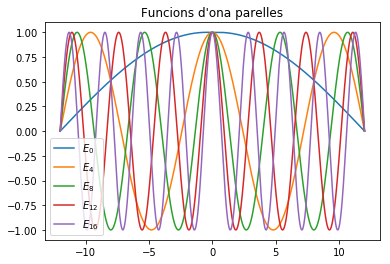

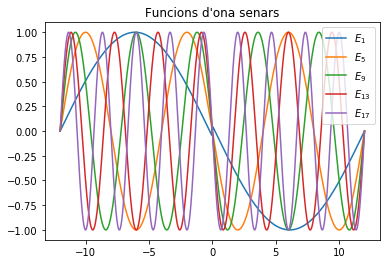

In [3]:
for i in range(0,5):
    plt.plot(x,phi_even(x,E[4*i]),
                       label = '$E_{%i}$' % (4*i))
    plt.legend()
plt.title("Funcions d'ona parelles")
plt.show()

for i in range(0,5):
    plt.plot(x,phi_odd(x,E[4*i+1]),
                       label = '$E_{%i}$' % (4*i+1))
    plt.legend()
plt.title("Funcions d'ona senars")
plt.show()

Representem - i normalitzem - el nostre paquet gaussià. També guardem en una matriu les funcions d'ona de la nostra base.

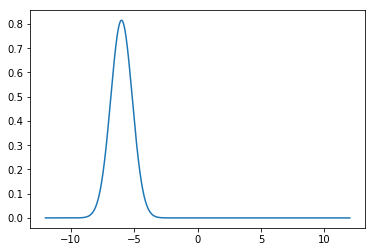

In [4]:
gauss = gaussian(x)/sqrt(quad(lambda x: (gaussian(x))**2,-L,L)[0])
plt.plot(x,gauss)
plt.show()

phi_basis = evaluate_wavefunction(x,E)

Ara podem aplicar l'operador "patada" a la nostra funció d'ona inicial. Treballarem amb nombres complexos.

In [5]:
phi_init = exp(1j*k*sqrt(T)*x)*gauss # Complex numbers array

Ara podem expressar $\texttt{phi_init}$ com a combinació lineal de les fucions d'ona de $\texttt{phi_basis}$. Per això trobem els coeficients emprant $\texttt{basis_coefficients}$. Aquests coeficients seran nombres complexos en general.

In [6]:
cn = basis_coefficients(phi_basis,phi_init,x)

In [7]:
# Estudiem la contribució de cada funció pròpia. 
# Podem veure si hem agafat suficients valors propis de H
dn = []
for i in cn:
    dn.append(real(i*conj(i)))
# dn
# Resultats coherents, OK!

Comprovem que el codi funciona. Reconstruïm la gaussiana pre-patada.

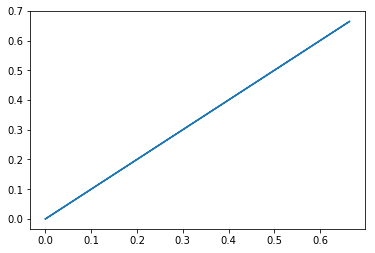

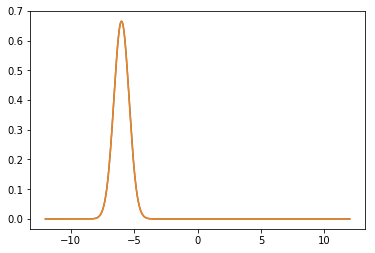

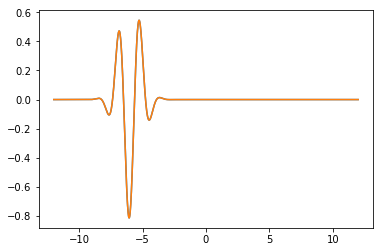

In [8]:
cnbis = basis_coefficients(phi_basis, gauss, x)
gauss_rec = sum( [cn[i]*phi_basis[i] for i in range(0,len(phi_basis)) ] )
plt.plot(gauss**2,real(gauss_rec*conj(gauss_rec)))
#plt.plot(x,gauss)
plt.show()
# Perfecte
plt.plot(x,real(gauss_rec*conj(gauss_rec)))
plt.plot(x,gauss**2)
plt.show()

plt.plot(x,real(phi_init))
plt.plot(x,real(gauss_rec))
plt.show()
# Si no superposa necessitem més estats propis

Ara simplement queda veure com evoluciona amb el temps la nostra funció d'ona inicial!

In [9]:
def phi_time_evolved(t):
    return time_evolve(x, phi_basis, cn, E, t)

# jugar per tenir més o menys temps
# més temps -> més frames i més temps de càrrega tb
n_frames = 1600
t_end = 0.4 # s
delay = t_end/n_frames*1000 # ms

t = linspace(0,t_end,n_frames)

phi_time = zeros((len(t),len(phi_basis[0])),dtype=complex)
phi_density = zeros((len(t),len(phi_basis[0])))

for i in range(0,len(t)):
    phi_time[i] = phi_time_evolved(t[i])
    phi_density[i] = real(phi_time[i]*conj(phi_time[i]))

In [10]:
timenow = time()
fig = plt.figure()
ax = plt.axes(xlim = (-L, L), ylim = (0,0.8))
line, = ax.plot([], [], lw = 1)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    y = phi_density[i]
    ax.set_title('Time %.0f ms' % (i*delay))
    ax.set_xlabel('Position (nm)')
    ax.set_ylabel('Probability')
    line.set_data(x, y)
    return line,

plt.plot(x,v(x))
anim = FuncAnimation(fig, animate, init_func=init,
                               frames = n_frames, interval = delay*100, blit=True)
HTML(anim.to_html5_video())

In [11]:
# Saving to mp4

timenow = time()
fig = plt.figure()
ax = plt.axes(xlim = (-L, L), ylim = (0,1.2))
line, = ax.plot([], [], lw = 1)

plt.plot(x,v(x))
anim = FuncAnimation(fig, animate, init_func=init,
                               frames = n_frames, interval = delay*100, blit=True)
anim.save('particle_in_a_box.mp4', writer="ffmpeg")
print('Hem trigat %.3f s' % (time()-timenow))

Hem trigat 51.725 s


In [12]:
print('Temps en correr tot el codi: %.3f s' % (time()-time_init))

Temps en correr tot el codi: 163.347 s
